<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

# <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [Build and Run a oxDNA Simulation](#1)
- [Run Multiple Simulations in Parallel](#2)
- [Umbrella Sampling](#3)

<font size='6'><a class="anchor" id="1"></a> <h2 align="center"> <font color='black'>Build and Run an oxDNA Simulation.</font></h2> 

<font size='3'><font color='black'>The Simulation class acts as an interface to an oxDNA simulation. </font>


In [1]:
from oxdna_simulation import Simulation

<font size='3'><font color='black'>It takes the path to a directory containing inital dat and top files (file_dir) and the directory you want to run the simulation in (sim_dir) as its only arguments. </font>

In [4]:
path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = f'{path}/rro'
sim_dir = f'{file_dir}/single_rro_sim_1'

sim = Simulation(file_dir, sim_dir)

<font size='3'><font color='black'>We can easily build a simulation that meets the minimum requirments to run a simulation using the build method.</font>

In [5]:
sim.build(clean_build='force')

<font size='3'><font color='black'>And then begin the simulation in a child subprocess using the oxpy_run.run method.</font>

In [6]:
sim.oxpy_run.run()

Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1


<font size='3'><font color='black'> This will run an oxDNA simulation using default parameters for 1 billion steps at 20C.</font>

<div class="alert alert-block alert-info">
<b>Note:</b> We can terminate a simulation using the oxpy_run.process.terminate method.
</div>

In [7]:
sim.oxpy_run.process.terminate()

INFO: Lists updated 396 times (every ~216.424242 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
	For a total of    0.394 MB/s



<font size='3'><font color='black'> To run a simulation with modified input parameters use the input_file file method</font>

In [8]:
#use a dictornary as the argument to input file
sim.input_file({'steps':'1e5', 'T':'30C', 'print_energy_every': '5e4', 'print_conf_interval':'5e4'})

[All oxDNA input parameters can be found in the documentation here.](https://lorenzo-rovigatti.github.io/oxDNA/input.html)

<div class="alert alert-block alert-info">
<b>Note:</b> The smaller the print_conf_interval the slower the simulation will run.
</div>

<font size='3'><font color='black'> Rerun with modifed parameters.</font>
    
<div class="alert alert-block alert-danger">  
<b>Warning:</b> Rerunning by default will overwrite all previous output simulation files  
</div>

In [9]:
sim.oxpy_run.run()

Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1


<font size='3'><font color='black'>We can check in with our simulation while it runs using the analysis module.</font>

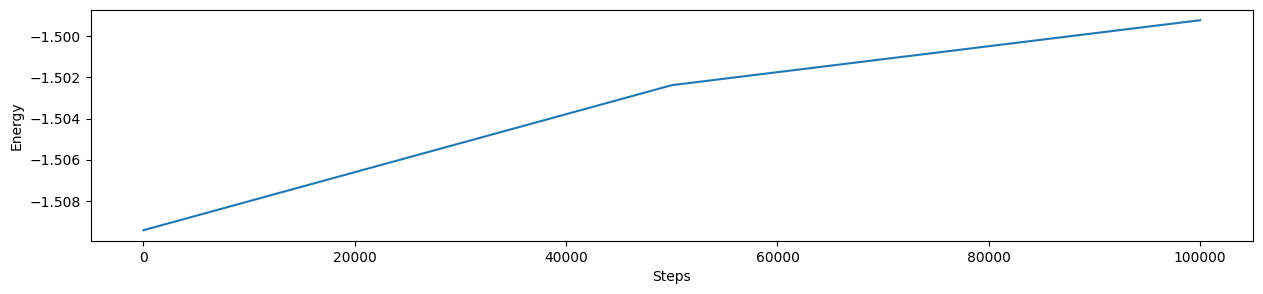

In [13]:
#A red line will be placed at the indicated number of steps in the input file
sim.analysis.plot_energy()

In [14]:
sim.analysis.view_last()

<font size='3'><font color='black'>To continue a previously run simulation for more steps without overriding previous files for a set amount of steps:</font>

In [15]:
sim.oxpy_run.process.terminate()

In [16]:
#sim = Simulation(file_dir, sim_dir)
sim.oxpy_run.run(steps=2e5, continue_run=True)

Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1


<font size='3'><font color='black'>To add external forces or observables we can use the Force and Observable class with the add_force and add_observable methods.sim.oxpy_run.process.terminate()</font>

In [17]:
sim.oxpy_run.process.terminate()

INFO: Lists updated 86 times (every ~207.976744 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
	For a total of      1.8 MB/s



In [18]:
from oxdna_simulation import Force, Observable
#The external forces will pull on the long edges of our rectangle to a distance of 30 sim untis.
com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

f = Force()
com_force_1 = f.com_force(
    com_list=com_list,                        
    ref_list=ref_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)
com_force_2 = f.com_force(
    com_list=ref_list,                        
    ref_list=com_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)

#The observable will save the distance between the center of mass of
#the com_list and ref_list to a file named com_distance.txt every 1e5 steps.
obs = Observable()
com_distance = obs.distance(
    particle_1=com_list,
    particle_2=ref_list,
    print_every='1e4',
    name='com_distance.txt'
)

sim.build(clean_build=True)
sim.add_force(com_force_1)
sim.add_force(com_force_2)
sim.add_observable(com_distance)

Are you sure you want to delete all simulation files? Type y/yes to continue or anything else to return (use clean_build=str(force) to skip this message) y


In [19]:
sim.oxpy_run.run(steps=1e7)

Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/single_rro_sim_1


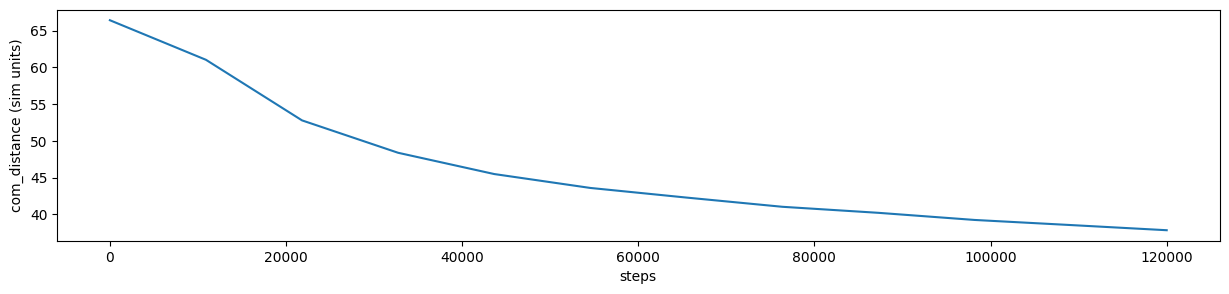

In [21]:
sim.analysis.plot_observable(com_distance)

In [22]:
sim.analysis.view_last()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [23]:
sim.oxpy_run.process.terminate()

INFO: Lists updated 900 times (every ~212.163333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     0.12 MB/s



<font size='6'><a class="anchor" id="2"></a> <h2 align="center"> <font color='black'>Run Multiple Simulations in Parallel.</font></h2> 

<font size='3'><font color='black'>The SimulationManager class enable us to queue multiple simulations to be run in parallel. The simulation manager takes advantage of the nvidia-cuda-mps-server daemon to run multiple oxDNA simulation per GPU.</font>
    
<font size='3'><font color='black'>Each simulation will occupy a CPU core and a certain amount of GPU memory. You can run #cores - 1 simulations in parallel, unless GPU memory is near full. Simulation processes will be allocated to the GPU with the most avalible memory until all GPU memory is near full or #cores - 1 are being run. Once a simulation has finished, additional queued simulations will be allocated to be run. You can queue as many simulations as you desire.</font>

In [24]:
from oxdna_simulation import Simulation, SimulationManager

<font size='3'><font color='black'>You can run multiple replicas of a single system with diffrent parameters. (i.e. temperatures)</font>

In [25]:
sim_manager = SimulationManager()
sim_manager.start_nvidia_cuda_mps_control()
#sim_manager.reset_nvidia_cuda_mps_control()

path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = f'{path}/rro'
temperatures = ['20C', '25C', '30C']
sim_dir_list = [f'{file_dir}/rro_{temp}' for temp in temperatures]

sim_list = [Simulation(file_dir, sim_dir) for sim_dir in sim_dir_list]

sim_parameters = [{'T':temp, 'steps':'1e7'} for temp in temperatures]
for sim_parameters, sim in zip(sim_parameters, sim_list):
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [26]:
sim_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_20C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_25C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_30C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


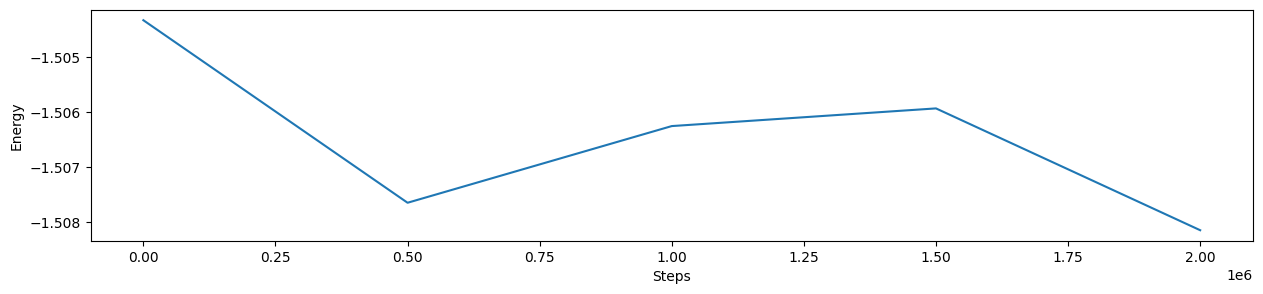

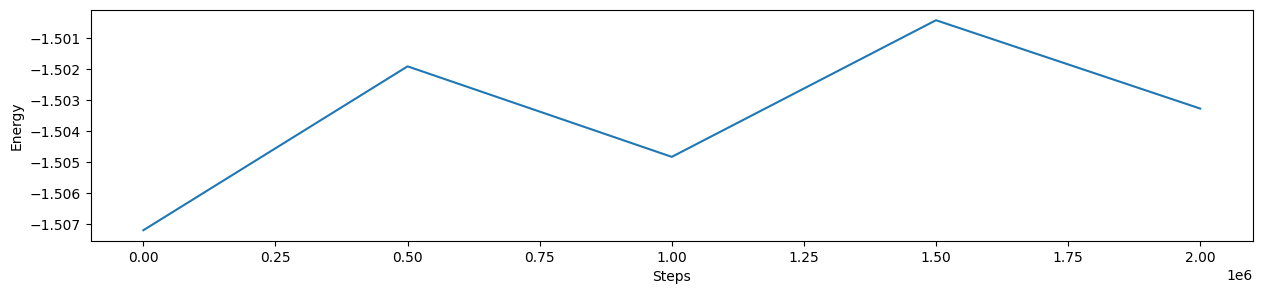

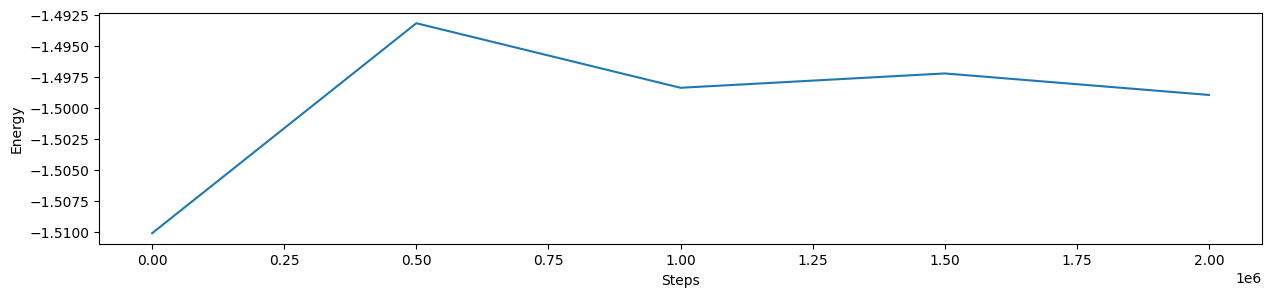

In [4]:
for sim in sim_list:
    sim.analysis.plot_energy()

<font size='3'><font color='black'>Alternatively you can run multiple diffrent systems in parallel.</font>

In [27]:
sim_manager = SimulationManager()

path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
systems = ['rro', 't9', 't20']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/{sys}_sys_example' for sys, file_dir in zip(systems, file_dir_list)]
sim_list = [Simulation(file_dir, sim_dir) for sim_dir, file_dir in zip(sim_dir_list, file_dir_list)]

sim_parameters = {'steps':'1e5', 'T':'20C', 'print_energy_every': '5e4', 'print_conf_interval':'5e4'}
for sim in sim_list:
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [28]:
sim_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/t9/t9_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.735 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/t20/t20_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.256 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_sys_example
Simulation worker finished


INFO: Lists updated 472 times (every ~211.864407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 16.842 MB written to files
	186.000  B written to stdout/stderr
	For a total of     1.34 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/t9/t9_sys_example
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/t20/t20_sys_example
Simulation worker finished
All queued simulations finished


<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Umbrella Sampling</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [1]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager

In [2]:
path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = f'{path}/rro'
system = 'rro_umbrella_com_2'

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 100

equlibration_parameters = {'steps':'1e6', 'T':'20C', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'}
production_parameters = {'steps':'1e6', 'T':'20C', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'}

us = ComUmbrellaSampling(file_dir, system)
simulation_manager = SimulationManager()

In [3]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [4]:
simulation_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/2
Simulation worker finished


INFO: Lists updated 4735 times (every ~211.193242 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of     0.02 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/0
Simulation worker finished


INFO: Lists updated 4652 times (every ~214.961307 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/40


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/1
Simulation worker finished


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0189 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/41


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/7
Simulation worker finished


INFO: Lists updated 4675 times (every ~213.903743 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/42


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/8
Simulation worker finished


INFO: Lists updated 4723 times (every ~211.729833 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/43


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/3
Simulation worker finished


INFO: Lists updated 4674 times (every ~213.949508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/4
Simulation worker finished


INFO: Lists updated 4618 times (every ~216.543958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/44


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/16
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/5
Simulation worker finished


INFO: Lists updated 4639 times (every ~215.563699 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0186 MB/s

INFO: Lists updated 4686 times (every ~213.401622 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0183 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/45


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/46


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/6
Simulation worker finished


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/47


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/48


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/15
Simulation worker finished


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0185 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/10
Simulation worker finished


INFO: Lists updated 4700 times (every ~212.765957 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/49


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/11
Simulation worker finished


INFO: Lists updated 4698 times (every ~212.856535 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0176 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/50


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/51


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/12
Simulation worker finished


INFO: Lists updated 4696 times (every ~212.947189 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0175 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/9
Simulation worker finished


INFO: Lists updated 4602 times (every ~217.296827 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/52


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/13
Simulation worker finished


INFO: Lists updated 4702 times (every ~212.675457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0174 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/53


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/54


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/23
Simulation worker finished


INFO: Lists updated 4591 times (every ~217.817469 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0181 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/55


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/24
Simulation worker finished


INFO: Lists updated 4736 times (every ~211.148649 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/56


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/14
Simulation worker finished


INFO: Lists updated 4645 times (every ~215.285253 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/57


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/19
Simulation worker finished


INFO: Lists updated 4674 times (every ~213.949508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/58


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/17
Simulation worker finished


INFO: Lists updated 4755 times (every ~210.304942 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/59


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/18
Simulation worker finished


INFO: Lists updated 4704 times (every ~212.585034 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/21
Simulation worker finished


INFO: Lists updated 4682 times (every ~213.583938 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/31
Simulation worker finished


INFO: Lists updated 4615 times (every ~216.684724 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/60


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/61


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/62


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/22
Simulation worker finished


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/63


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/20
Simulation worker finished


INFO: Lists updated 4691 times (every ~213.174163 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/32
Simulation worker finished


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/26
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/64


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/65


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/66


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/25
Simulation worker finished


INFO: Lists updated 4604 times (every ~217.202433 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/67


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/27
Simulation worker finished


INFO: Lists updated 4750 times (every ~210.526316 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/68


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/28
Simulation worker finished


INFO: Lists updated 4686 times (every ~213.401622 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/30
Simulation worker finished


INFO: Lists updated 4705 times (every ~212.539851 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/69


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/29
Simulation worker finished


INFO: Lists updated 4773 times (every ~209.511837 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/34
Simulation worker finished


INFO: Lists updated 4774 times (every ~209.467951 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/70


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/33
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/71


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/72


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/35
Simulation worker finished


INFO: Lists updated 4701 times (every ~212.720698 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/73
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/36
Simulation worker finished


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 4689 times (every ~213.265089 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/37
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/74


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/75


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/76


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/38
Simulation worker finished


INFO: Lists updated 4714 times (every ~212.134069 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/77


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/42
Simulation worker finished


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0176 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/78


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/39
Simulation worker finished


INFO: Lists updated 4739 times (every ~211.014982 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/79


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/40
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/48
Simulation worker finished


INFO: Lists updated 4706 times (every ~212.494688 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s

INFO: Lists updated 4665 times (every ~214.362272 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0176 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/41
Simulation worker finished


INFO: Lists updated 4655 times (every ~214.822771 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/80


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/81


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/82


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/43
Simulation worker finished


INFO: Lists updated 4681 times (every ~213.629566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/51
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0176 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/83


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/84


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/44
Simulation worker finished


INFO: Lists updated 4632 times (every ~215.889465 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/85


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/45
Simulation worker finished


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/47
Simulation worker finished
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/86


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 4620 times (every ~216.450216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/46
Simulation worker finished


INFO: Lists updated 4720 times (every ~211.864407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/87


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/88


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/49
Simulation worker finished


INFO: Lists updated 4697 times (every ~212.901852 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/89


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/50
Simulation worker finished


INFO: Lists updated 4714 times (every ~212.134069 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/58
Simulation worker finished


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/90


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/91


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/52
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/54
Simulation worker finished


INFO: Lists updated 4672 times (every ~214.041096 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s

INFO: Lists updated 4665 times (every ~214.362272 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/53
Simulation worker finished


INFO: Lists updated 4633 times (every ~215.842866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/62
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/92


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/55
Simulation worker finished


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/93


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/56
Simulation worker finished


INFO: Lists updated 4753 times (every ~210.393436 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/94


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/95


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/64
Simulation worker finished


INFO: Lists updated 4678 times (every ~213.766567 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/96


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/57
Simulation worker finished


INFO: Lists updated 4643 times (every ~215.377988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/97


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/65
Simulation worker finished


INFO: Lists updated 4730 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/98


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/99


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/59
Simulation worker finished


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/60
Simulation worker finished


INFO: Lists updated 4737 times (every ~211.104074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/61
Simulation worker finished


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/63
Simulation worker finished


INFO: Lists updated 4718 times (every ~211.954218 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/71
Simulation worker finished


INFO: Lists updated 4709 times (every ~212.359312 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/66
Simulation worker finished


INFO: Lists updated 4712 times (every ~212.224109 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/74
Simulation worker finished


INFO: Lists updated 4734 times (every ~211.237854 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/67
Simulation worker finished


INFO: Lists updated 4626 times (every ~216.169477 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/68
Simulation worker finished


INFO: Lists updated 4662 times (every ~214.500215 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/70
Simulation worker finished


INFO: Lists updated 4706 times (every ~212.494688 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/69
Simulation worker finished


INFO: Lists updated 4631 times (every ~215.936083 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/75
Simulation worker finished


INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/72
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/73
Simulation worker finished


INFO: Lists updated 4683 times (every ~213.538330 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s

INFO: Lists updated 4657 times (every ~214.730513 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/76
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0171 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/77
Simulation worker finished


INFO: Lists updated 4660 times (every ~214.592275 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/88
Simulation worker finished


INFO: Lists updated 4703 times (every ~212.630236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0349 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/93
Simulation worker finished


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0373 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/87
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0345 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/82
Simulation worker finished


INFO: Lists updated 4691 times (every ~213.174163 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.028 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/89
Simulation worker finished


INFO: Lists updated 4672 times (every ~214.041096 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0297 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/94
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/95
Simulation worker finished


INFO: Lists updated 4700 times (every ~212.765957 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0314 MB/s

INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0317 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/78
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0204 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/79
Simulation worker finished


INFO: Lists updated 4552 times (every ~219.683656 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0205 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/83
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/84
Simulation worker finishedSimulation worker finished



INFO: Lists updated 4678 times (every ~213.766567 steps)
INFO: Lists updated 4530 times (every ~220.750552 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0209 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.021 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/92
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0222 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/96
Simulation worker finished


INFO: Lists updated 4631 times (every ~215.936083 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0226 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/97
Simulation worker finished


INFO: Lists updated 4672 times (every ~214.041096 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0228 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/80
Simulation worker finished


INFO: Lists updated 4633 times (every ~215.842866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0189 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/81
Simulation worker finished


INFO: Lists updated 4661 times (every ~214.546235 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0189 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/86
Simulation worker finished


INFO: Lists updated 4669 times (every ~214.178625 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/85
Simulation worker finished


INFO: Lists updated 4713 times (every ~212.179079 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/90
Simulation worker finished


INFO: Lists updated 4680 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/91
Simulation worker finished


INFO: Lists updated 4638 times (every ~215.610177 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0195 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/99
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/equlibration/98
Simulation worker finished


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0204 MB/s

INFO: Lists updated 4639 times (every ~215.563699 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.112 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0204 MB/s



All queued simulations finished


In [3]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [4]:
simulation_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/1
Simulation worker finished


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0212 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/3
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0208 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/4
Simulation worker finished


INFO: Lists updated 4703 times (every ~212.630236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0206 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/40


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/0
Simulation worker finished


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0199 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/41


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/2
Simulation worker finished


INFO: Lists updated 4628 times (every ~216.076059 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0196 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/5
Simulation worker finished


INFO: Lists updated 4653 times (every ~214.915109 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0201 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/42


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/43


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/9
Simulation worker finished


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0197 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/44


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/10
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/45


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/6
Simulation worker finished


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0187 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/46


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/7
Simulation worker finished


INFO: Lists updated 4661 times (every ~214.546235 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0185 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/47


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/14
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/8
Simulation worker finished


INFO: Lists updated 4617 times (every ~216.590860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s

INFO: Lists updated 4645 times (every ~215.285253 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0183 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/48


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/15
Simulation worker finished


INFO: Lists updated 4603 times (every ~217.249620 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/49


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/11
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/50


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/16
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0186 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/51


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/52


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/17
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/12
Simulation worker finished


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s

INFO: Lists updated 4632 times (every ~215.889465 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/53


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/13
Simulation worker finished


INFO: Lists updated 4636 times (every ~215.703192 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.101 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/54


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/55


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/23
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/56


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/21
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/57


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/24
Simulation worker finished


INFO: Lists updated 4598 times (every ~217.485863 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/58


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/25
Simulation worker finished


INFO: Lists updated 4651 times (every ~215.007525 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/18
Simulation worker finished


INFO: Lists updated 4615 times (every ~216.684724 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/59


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/19
Simulation worker finished


INFO: Lists updated 4683 times (every ~213.538330 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0171 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/60


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/61


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/31
Simulation worker finished


INFO: Lists updated 4651 times (every ~215.007525 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0181 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/62


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/30
Simulation worker finished


INFO: Lists updated 4676 times (every ~213.857998 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/32
Simulation worker finished


INFO: Lists updated 4579 times (every ~218.388294 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/63


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/64


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/20
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/22
Simulation worker finished


INFO: Lists updated 4585 times (every ~218.102508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s

INFO: Lists updated 4671 times (every ~214.086919 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/33
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/65


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/66


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/67


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/26
Simulation worker finished


INFO: Lists updated 4600 times (every ~217.391304 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.101 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/68


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/27
Simulation worker finished


INFO: Lists updated 4756 times (every ~210.260723 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/69


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/28
Simulation worker finished


INFO: Lists updated 4624 times (every ~216.262976 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/29
Simulation worker finished


INFO: Lists updated 4589 times (every ~217.912399 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/70


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/71


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/34
Simulation worker finished


INFO: Lists updated 4719 times (every ~211.909303 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/36
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/35
Simulation worker finished


INFO: Lists updated 4710 times (every ~212.314225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/72


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/37
Simulation worker finished


INFO: Lists updated 4610 times (every ~216.919740 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/73


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/74


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/75


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/42
Simulation worker finished


INFO: Lists updated 4621 times (every ~216.403376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/38
Simulation worker finished


INFO: Lists updated 4626 times (every ~216.169477 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/76


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/39
Simulation worker finished


INFO: Lists updated 4778 times (every ~209.292591 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/77


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/78


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/40
Simulation worker finished


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/79


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/45
Simulation worker finished


INFO: Lists updated 4559 times (every ~219.346348 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/80


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/41
Simulation worker finished


INFO: Lists updated 4698 times (every ~212.856535 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/81


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/43
Simulation worker finished


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/82


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/48
Simulation worker finished


INFO: Lists updated 4652 times (every ~214.961307 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/44
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/49
Simulation worker finished


INFO: Lists updated 4691 times (every ~213.174163 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s

INFO: Lists updated 4656 times (every ~214.776632 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/83


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/51
Simulation worker finished


INFO: Lists updated 4630 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/84


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/85


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/86


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/46
Simulation worker finished


INFO: Lists updated 4709 times (every ~212.359312 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/47
Simulation worker finished


INFO: Lists updated 4655 times (every ~214.822771 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/53
Simulation worker finished


INFO: Lists updated 4669 times (every ~214.178625 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/87


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/54


INFO: Lists updated 4601 times (every ~217.344056 steps)


Simulation worker finished


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/88


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/55
Simulation worker finished


INFO: Lists updated 4611 times (every ~216.872696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/89


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/90


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/91


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/50
Simulation worker finished


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/52
Simulation worker finished


INFO: Lists updated 4644 times (every ~215.331611 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/92


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/93


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/62
Simulation worker finished


INFO: Lists updated 4634 times (every ~215.796288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/94


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/56
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/95


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/57


INFO: Lists updated 4692 times (every ~213.128730 steps)


Simulation worker finished


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/65
Simulation worker finished


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/96
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/58
Simulation worker finished


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.114 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/59
Simulation worker finished


INFO: Lists updated 4619 times (every ~216.497077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/60
Simulation worker finished


INFO: Lists updated 4628 times (every ~216.076059 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/97


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/98


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/68
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/99


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/61
Simulation worker finished


INFO: Lists updated 4702 times (every ~212.675457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/69
Simulation worker finished


INFO: Lists updated 4620 times (every ~216.450216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/64
Simulation worker finished


INFO: Lists updated 4611 times (every ~216.872696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/63
Simulation worker finished


INFO: Lists updated 4688 times (every ~213.310580 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/70
Simulation worker finished


INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/71
Simulation worker finished


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/73
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/72
Simulation worker finished


INFO: Lists updated 4543 times (every ~220.118864 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s

INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/66
Simulation worker finished


INFO: Lists updated 4716 times (every ~212.044105 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/67
Simulation worker finished


INFO: Lists updated 4648 times (every ~215.146299 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/74
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/75
Simulation worker finished


INFO: Lists updated 4603 times (every ~217.249620 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/77
Simulation worker finished


INFO: Lists updated 4589 times (every ~217.912399 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0243 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/76
Simulation worker finished


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0242 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/84
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0262 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/80
Simulation worker finished


INFO: Lists updated 4697 times (every ~212.901852 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0245 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/87
Simulation worker finished


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0269 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/81
Simulation worker finished


INFO: Lists updated 4652 times (every ~214.961307 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0248 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/91
Simulation worker finished


INFO: Lists updated 4608 times (every ~217.013889 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0282 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/88
Simulation worker finished


INFO: Lists updated 4721 times (every ~211.819530 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0268 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/78
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0224 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/90
Simulation worker finished


INFO: Lists updated 4671 times (every ~214.086919 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0269 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/89
Simulation worker finished


INFO: Lists updated 4674 times (every ~213.949508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0268 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/82
Simulation worker finished


INFO: Lists updated 4633 times (every ~215.842866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0229 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/83
Simulation worker finished


INFO: Lists updated 4630 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0232 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/92
Simulation worker finished


INFO: Lists updated 4552 times (every ~219.683656 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0248 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/94
Simulation worker finished


INFO: Lists updated 4572 times (every ~218.722660 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.026 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/97
Simulation worker finished


INFO: Lists updated 4588 times (every ~217.959895 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0271 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/79
Simulation worker finished


INFO: Lists updated 4555 times (every ~219.538968 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/85
Simulation worker finished


INFO: Lists updated 4639 times (every ~215.563699 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/86
Simulation worker finished


INFO: Lists updated 4703 times (every ~212.630236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/93
Simulation worker finished


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0199 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/95
Simulation worker finished


INFO: Lists updated 4578 times (every ~218.435998 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0205 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/96
Simulation worker finished


INFO: Lists updated 4643 times (every ~215.377988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0208 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/98
Simulation worker finished


INFO: Lists updated 4610 times (every ~216.919740 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.021 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/99
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0211 MB/s



All queued simulations finished


In [10]:
wham_dir = '//scratch/matthew/automate/ipy_oxDNA/rewrite/wham/wham/'
n_bins = '200'
tol = '1e-5'
n_boot = '30'
us.wham_job(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed


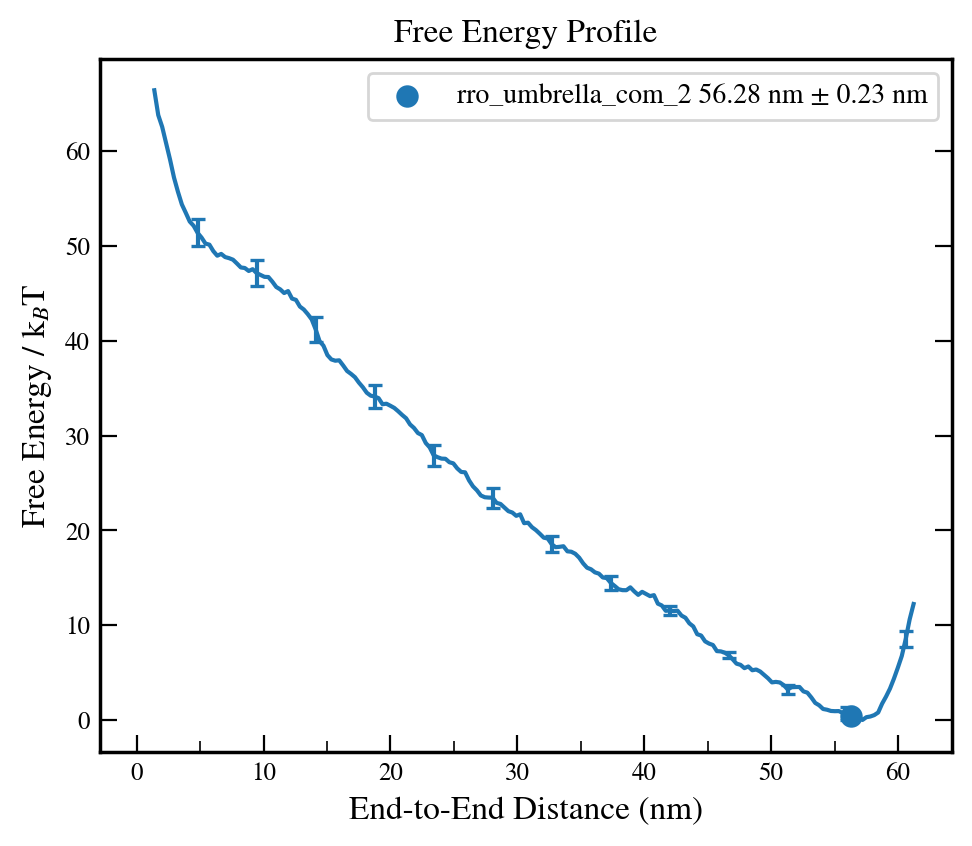

In [11]:
us.plot_free()

<font size='6'><a class="anchor" id="4"></a> <h2 align="center"> <font color='black'>Multiple Umbrella Sampling Systems</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [2]:
simulation_manager = SimulationManager()
simulation_manager.start_nvidia_cuda_mps_control()

An instance of this daemon is already running


In [1]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager

In [2]:
path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = f'{path}/rro'
system = [f'rro_umbrella_benchmarking_{sys}' for sys in range(5)]

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 40

equlibration_parameters = [{'steps':'3e5', 'print_energy_every': '3e5', 'print_conf_interval':'3e5'},
                           {'steps':'3e5',  'print_energy_every': '3e5', 'print_conf_interval':'3e5','fix_diffusion':'0'}
                          ]
production_parameters = [{'steps':'1e6', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'} for _ in range(3)]


us_0 = ComUmbrellaSampling(file_dir, system[0])
us_1 = ComUmbrellaSampling(file_dir, system[1])
us_2 = ComUmbrellaSampling(file_dir, system[2])
us_3 = ComUmbrellaSampling(file_dir, system[3])
us_4 = ComUmbrellaSampling(file_dir, system[4])
#us_6 = ComUmbrellaSampling(file_dir, system[5])



simulation_manager = SimulationManager()

In [3]:
us_0.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e4, name='com_distance.txt')
us_1.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=False, print_every=1e4, name='com_distance.txt')
us_2.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[1], observable=True, print_every=1e4, name='com_distance.txt')
us_3.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[1], observable=False, print_every=1e4, name='com_distance.txt')
us_4.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e3, name='com_distance.txt')
#us_5.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e4, name='com_distance.txt')


In [4]:
simulation_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/0
Run time: -112.05516339791939


INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.111 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/1
Run time: -116.3454485735856


INFO: Lists updated 1395 times (every ~215.053763 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.111 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/2
Run time: -123.39028055919334


INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.103 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/3
Run time: -134.16642111120746


INFO: Lists updated 1423 times (every ~210.822207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0933 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/4
Run time: -136.22089626686648


INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0906 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/6
Run time: -134.7109885290265


INFO: Lists updated 1453 times (every ~206.469374 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.091 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/5
Run time: -137.43069004965946


INFO: Lists updated 1402 times (every ~213.980029 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0883 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/7
Run time: -141.34717688895762


INFO: Lists updated 1386 times (every ~216.450216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0857 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/8
Run time: -144.81284897308797


INFO: Lists updated 1406 times (every ~213.371266 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0818 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/10
Run time: -150.18554472504184


INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0797 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/9
Run time: -156.4656513556838
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/7


INFO: Lists updated 1411 times (every ~212.615167 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0767 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/11
Run time: -158.5004910537973


INFO: Lists updated 1411 times (every ~212.615167 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0742 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/12
Run time: -164.65876993117854


INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0717 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/13
Run time: -169.86688082991168


INFO: Lists updated 1407 times (every ~213.219616 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0696 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/14
Run time: -167.39558676909655


INFO: Lists updated 1402 times (every ~213.980029 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0712 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/15
Run time: -173.0078277150169


INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0685 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/16
Run time: -174.90232658199966


INFO: Lists updated 1399 times (every ~214.438885 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0674 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/17
Run time: -183.82257056143135


INFO: Lists updated 1396 times (every ~214.899713 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0636 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/18
Run time: -181.0775051866658


INFO: Lists updated 1427 times (every ~210.231254 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0646 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/19
Run time: -185.27255839202553


INFO: Lists updated 1420 times (every ~211.267606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0626 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/20
Run time: -186.08677574573085


INFO: Lists updated 1398 times (every ~214.592275 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0624 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/22
Run time: -187.5323686688207


INFO: Lists updated 1439 times (every ~208.478110 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0616 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/21
Run time: -192.50114427693188


INFO: Lists updated 1409 times (every ~212.916962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0598 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/23
Run time: -188.60972367879003


INFO: Lists updated 1380 times (every ~217.391304 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0613 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/24
Run time: -186.16664948267862


INFO: Lists updated 1422 times (every ~210.970464 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0609 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/26
Run time: -186.80967318220064


INFO: Lists updated 1384 times (every ~216.763006 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0605 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/27
Run time: -187.54273996595293


INFO: Lists updated 1393 times (every ~215.362527 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0594 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/25
Run time: -195.04073228593916


INFO: Lists updated 1400 times (every ~214.285714 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0581 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/28
Run time: -193.25148345017806


INFO: Lists updated 1400 times (every ~214.285714 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0593 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/30
Run time: -189.62454946292564


INFO: Lists updated 1392 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0596 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/29
Run time: -194.7102477918379


INFO: Lists updated 1385 times (every ~216.606498 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0578 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/32
Run time: -190.49573897523805


INFO: Lists updated 1387 times (every ~216.294160 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0588 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/31
Run time: -194.3893931657076
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1420 times (every ~211.267606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0588 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/34
Run time: -190.94259623996913
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/29


INFO: Lists updated 1408 times (every ~213.068182 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0593 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/33
Run time: -196.30495178001001


INFO: Lists updated 1421 times (every ~211.118930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/35
Run time: -190.4707095483318


INFO: Lists updated 1372 times (every ~218.658892 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0592 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/36
Run time: -190.96961989812553
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1420 times (every ~211.267606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0593 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/37
Run time: -198.39612478390336


INFO: Lists updated 1423 times (every ~210.822207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/38
Run time: -197.4914598907344


INFO: Lists updated 1442 times (every ~208.044383 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_0/equlibration/39
Run time: -192.92879866389558


INFO: Lists updated 1415 times (every ~212.014134 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.059 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/0
Run time: -189.90239946031943


INFO: Lists updated 1473 times (every ~203.665988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0567 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/1
Run time: -188.55550374509767


INFO: Lists updated 1429 times (every ~209.937019 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0579 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/2
Run time: -188.564330924768


INFO: Lists updated 1442 times (every ~208.044383 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0583 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/3
Run time: -187.95504651218653


INFO: Lists updated 1423 times (every ~210.822207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0584 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/4
Run time: -190.31775745097548


INFO: Lists updated 1430 times (every ~209.790210 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/5
Run time: -196.30157388700172


INFO: Lists updated 1435 times (every ~209.059233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0556 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/6
Run time: -195.99320798600093


INFO: Lists updated 1435 times (every ~209.059233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0557 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/7
Run time: -191.9070246256888


INFO: Lists updated 1409 times (every ~212.916962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.057 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/8
Run time: -191.25717995781451


INFO: Lists updated 1395 times (every ~215.053763 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.057 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/9
Run time: -192.1885181767866


INFO: Lists updated 1430 times (every ~209.790210 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0569 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/10
Run time: -184.79852633783594


INFO: Lists updated 1394 times (every ~215.208034 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0592 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/12
Run time: -190.1981110642664


INFO: Lists updated 1409 times (every ~212.916962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/11
Run time: -195.26401364430785


INFO: Lists updated 1387 times (every ~216.294160 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0555 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/13
Run time: -188.28730681119487


INFO: Lists updated 1397 times (every ~214.745884 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/14
Run time: -196.54537471290678


INFO: Lists updated 1391 times (every ~215.672178 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0551 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/16
Run time: -187.8042521737516


INFO: Lists updated 1389 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0577 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/15
Run time: -194.95118496799842


INFO: Lists updated 1379 times (every ~217.548949 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0556 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/13
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/17
Run time: -186.5431242599152


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1432 times (every ~209.497207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0582 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/18
Run time: -185.86349145695567


INFO: Lists updated 1436 times (every ~208.913649 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0584 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/19
Run time: -192.11546218022704


INFO: Lists updated 1402 times (every ~213.980029 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0563 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/20
Run time: -191.91780310496688


INFO: Lists updated 1399 times (every ~214.438885 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0564 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/23
Run time: -182.95015154685825


INFO: Lists updated 1401 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0593 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/21
Run time: -192.94160270504653


INFO: Lists updated 1387 times (every ~216.294160 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.056 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/22
Run time: -191.37325438205153


INFO: Lists updated 1381 times (every ~217.233888 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0561 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/24
Run time: -187.2813256252557


INFO: Lists updated 1425 times (every ~210.526316 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/25
Run time: -187.4196843872778


INFO: Lists updated 1431 times (every ~209.643606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/27
Run time: -181.1568932798691


INFO: Lists updated 1379 times (every ~217.548949 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0594 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/26
Run time: -188.6662525315769


INFO: Lists updated 1389 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0568 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/28
Run time: -190.72850799700245


INFO: Lists updated 1407 times (every ~213.219616 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0563 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/29
Run time: -190.4301779284142


INFO: Lists updated 1412 times (every ~212.464589 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0564 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/32
Run time: -181.30414047511294


INFO: Lists updated 1414 times (every ~212.164074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0593 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/30
Run time: -188.98879981413484


INFO: Lists updated 1406 times (every ~213.371266 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/31
Run time: -186.9550452628173
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/33
Run time: -179.76462881313637


INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0576 MB/s

INFO: Lists updated 1401 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0595 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/34
Run time: -178.3022297397256


INFO: Lists updated 1392 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0596 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/35
Run time: -188.12053370010108


INFO: Lists updated 1414 times (every ~212.164074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/36
Run time: -187.51716243382543


INFO: Lists updated 1405 times (every ~213.523132 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/37
Run time: -188.07653200579807


INFO: Lists updated 1410 times (every ~212.765957 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0572 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/38
Run time: -185.57477721199393


INFO: Lists updated 1363 times (every ~220.102715 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_1/equlibration/39
Run time: -184.65239893179387


INFO: Lists updated 1394 times (every ~215.208034 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0582 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/1
Run time: -193.28087326092646


INFO: Lists updated 1450 times (every ~206.896552 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0589 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/0
Run time: -204.04324650205672


INFO: Lists updated 1421 times (every ~211.118930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0557 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/2
Run time: -201.97072086809203


INFO: Lists updated 1446 times (every ~207.468880 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0557 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/3
Run time: -196.41505587473512


INFO: Lists updated 1460 times (every ~205.479452 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/4
Run time: -202.85468148766086


INFO: Lists updated 1459 times (every ~205.620288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0555 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/5
Run time: -199.58894997276366


INFO: Lists updated 1436 times (every ~208.913649 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0559 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/6
Run time: -199.71088607097045


INFO: Lists updated 1418 times (every ~211.565585 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0563 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/8
Run time: -190.32965896837413


INFO: Lists updated 1405 times (every ~213.523132 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0595 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/7
Run time: -199.85717141395435


INFO: Lists updated 1455 times (every ~206.185567 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0563 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/9
Run time: -196.7524478919804


INFO: Lists updated 1424 times (every ~210.674157 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/10
Run time: -196.7030383250676


INFO: Lists updated 1418 times (every ~211.565585 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/7
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/11
Run time: -197.24880883004516


INFO: Lists updated 1435 times (every ~209.059233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/12
Run time: -200.24656202597544


INFO: Lists updated 1415 times (every ~212.014134 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0558 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/10
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/15
Run time: -188.7228299016133


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1406 times (every ~213.371266 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0596 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/16
Run time: -187.54975336696953


INFO: Lists updated 1414 times (every ~212.164074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0598 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/13
Run time: -202.90288337413222


INFO: Lists updated 1429 times (every ~209.937019 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0552 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/14
Run time: -199.81764313019812


INFO: Lists updated 1423 times (every ~210.822207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0557 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/17
Run time: -193.86120282299817


INFO: Lists updated 1433 times (every ~209.351012 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/19
Run time: -186.25896790483966


INFO: Lists updated 1410 times (every ~212.765957 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of     0.06 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/18
Run time: -193.47658771183342


INFO: Lists updated 1440 times (every ~208.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/20
Run time: -194.76649891817942


INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0566 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/21
Run time: -193.24618038488552


INFO: Lists updated 1438 times (every ~208.623088 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0566 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/22
Run time: -190.90854078624398


INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/24
Run time: -183.77512347139418
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/18


INFO: Lists updated 1396 times (every ~214.899713 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0601 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/23
Run time: -192.70760758174583


INFO: Lists updated 1445 times (every ~207.612457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.031 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/25
Run time: -186.3472303552553


INFO: Lists updated 1404 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0598 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/26
Run time: -191.58556371880695


INFO: Lists updated 1390 times (every ~215.827338 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0575 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/28
Run time: -185.62451561540365


INFO: Lists updated 1414 times (every ~212.164074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0595 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/29
Run time: -184.80741861881688


INFO: Lists updated 1392 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0597 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/27
Run time: -192.31276712194085


INFO: Lists updated 1440 times (every ~208.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/30
Run time: -198.36306124692783


INFO: Lists updated 1405 times (every ~213.523132 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0553 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/32
Run time: -192.28647724725306


INFO: Lists updated 1402 times (every ~213.980029 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0571 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/31
Run time: -198.4236813597381
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1399 times (every ~214.438885 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0553 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/33
Run time: -193.18862711405382


INFO: Lists updated 1392 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0572 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/34
Run time: -194.80558620626107


INFO: Lists updated 1416 times (every ~211.864407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0566 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/35
Run time: -194.0367748751305
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0567 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/32
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/36
Run time: -194.21751789888367


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0568 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/37
Run time: -194.39431816805154


INFO: Lists updated 1417 times (every ~211.714891 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0568 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/38
Run time: -190.69608120806515


INFO: Lists updated 1412 times (every ~212.464589 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.031 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0581 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/0
Run time: -183.93102943478152


INFO: Lists updated 1424 times (every ~210.674157 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0574 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_2/equlibration/39
Run time: -193.77572591602802


INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.057 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.341 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/1
Run time: -193.3727862490341


INFO: Lists updated 1405 times (every ~213.523132 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0544 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.342 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/2
Run time: -187.31263388413936


INFO: Lists updated 1442 times (every ~208.044383 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.056 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/5
Run time: -187.46102384477854
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/3
Run time: -195.3126895353198


INFO: Lists updated 1445 times (every ~207.612457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0562 MB/s

INFO: Lists updated 1441 times (every ~208.188758 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0539 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/6
Run time: -185.5222772168927


INFO: Lists updated 1418 times (every ~211.565585 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0567 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/4
Run time: -194.80264764092863


INFO: Lists updated 1461 times (every ~205.338809 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0539 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/7
Run time: -186.89470646344125


INFO: Lists updated 1429 times (every ~209.937019 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0563 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/8
Run time: -187.77459248900414


INFO: Lists updated 1466 times (every ~204.638472 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0559 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/9
Run time: -187.6191525538452


INFO: Lists updated 1398 times (every ~214.592275 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.056 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/10
Run time: -184.55784551799297


INFO: Lists updated 1378 times (every ~217.706821 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0568 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/11
Run time: -187.51476280670613


INFO: Lists updated 1423 times (every ~210.822207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0561 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/12
Run time: -186.66133889975026


INFO: Lists updated 1411 times (every ~212.615167 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0562 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/13
Run time: -193.5813571070321


INFO: Lists updated 1444 times (every ~207.756233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0542 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/14
Run time: -192.05384912202135


INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0545 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/16
Run time: -184.70497656520456


INFO: Lists updated 1449 times (every ~207.039337 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0568 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/15
Run time: -190.59335730597377


INFO: Lists updated 1442 times (every ~208.044383 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0549 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/17
Run time: -183.84192068083212


INFO: Lists updated 1438 times (every ~208.623088 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.057 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/18
Run time: -183.09649770287797


INFO: Lists updated 1404 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0573 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/19
Run time: -184.82636878779158


INFO: Lists updated 1418 times (every ~211.565585 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0565 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/20
Run time: -183.22092045424506


INFO: Lists updated 1413 times (every ~212.314225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.057 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/21
Run time: -181.4814820108004


INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0576 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/22
Run time: -178.53726446907967


INFO: Lists updated 1417 times (every ~211.714891 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0585 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/23
Run time: -178.59090127702802


INFO: Lists updated 1461 times (every ~205.338809 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0586 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/26
Run time: -173.28897759597749


INFO: Lists updated 1403 times (every ~213.827512 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0604 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/24
Run time: -180.9541240646504


INFO: Lists updated 1426 times (every ~210.378682 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.031 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0578 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/27
Run time: -170.9789814800024
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/19


INFO: Lists updated 1401 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0611 MB/s

	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/25
Run time: -180.02081201039255


INFO: Lists updated 1433 times (every ~209.351012 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.026 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0577 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/30
Run time: -166.66544093284756


INFO: Lists updated 1414 times (every ~212.164074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0628 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/31
Run time: -163.6193777457811


INFO: Lists updated 1405 times (every ~213.523132 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0635 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/28
Run time: -177.3999143927358


INFO: Lists updated 1420 times (every ~211.267606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0589 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/29
Run time: -175.68564294697717


INFO: Lists updated 1435 times (every ~209.059233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0592 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/32
Run time: -178.0934985340573


INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0588 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/28
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/35
Run time: -168.50042928103358


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1419 times (every ~211.416490 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.062 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/33
Run time: -177.63583469111472


INFO: Lists updated 1389 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.029 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0589 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/34
Run time: -176.2073845360428
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/29

INFO: Lists updated 1404 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.030 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0594 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/36
Run time: -165.1905183508061


INFO: Lists updated 1403 times (every ~213.827512 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0635 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/37
Run time: -167.08226786600426


INFO: Lists updated 1412 times (every ~212.464589 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0628 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/39
Run time: -154.89774441486225


INFO: Lists updated 1404 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.028 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0679 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_3/equlibration/38
Run time: -164.89129951503128
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/32


INFO: Lists updated 1441 times (every ~208.188758 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.027 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0637 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/1
Run time: -271.733909455128


INFO: Lists updated 1416 times (every ~211.864407 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0859 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/0
Run time: -284.8698479728773


INFO: Lists updated 1443 times (every ~207.900208 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0821 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_benchmarking_4/equlibration/3
Run time: -274.36778067285195


INFO: Lists updated 1339 times (every ~224.047797 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0879 MB/s



In [ ]:
#Nucleotide indexes used to represent first component of your order parameter
#comma separated list of indexes can be obtained using the selection function on oxView
com_list = ['63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829',
            '175,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,6847,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6753',
            '103,197,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,6870,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869'
           ]
#Nucleotide indexes used to represent second component of your order parameter
ref_list = ['3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446',
            '3472,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3473,3557,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3558,3559',
            '3392,3580,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3581'
           ]

stiff = [0.2, 0.2, 0.2]
xmin = [0, 0, 0]
xmax = [72, 72, 72]
n_windows = [100, 100, 100]
equlibration_parameters = [{'steps':'2e4'}, {'steps':'2e4'}, {'steps':'2e4'}]

path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = [f'{path}/rro', f'{path}/t9', f'{path}/t20']
system = ['rro_umbrella' 't9_umbrella', 't20_umbrella']

umbrella_objects = {}
for files, sys in zip(file_dir, system):
    umbrella_objects[sys] = BaseUmbrellaSampling(files, sys)

In [9]:
import subprocess as sp

def get_gpu_memory():
    output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]
    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    try:
        memory_use_info = output_to_list(sp.check_output(COMMAND.split(),stderr=sp.STDOUT))[1:]
    except sp.CalledProcessError as e:
        raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))
    memory_use_values = [int(x.split()[0]) for i, x in enumerate(memory_use_info)]
    # print(memory_use_values)
    return memory_use_values
get_gpu_memory()

[29119, 27854, 27854, 29119]

INFO: Lists updated 1386 times (every ~216.450216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.112 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0859 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1434 times (every ~209.205021 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0929 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 1409 times (every ~212.916962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0935 MB/s

INFO: Lists updated 1424 times (every ~210.674